<a href="https://colab.research.google.com/github/RohithMacharla11/-AI-Driven-Recruitment-Pipeline/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# /content/drive/MyDrive/Approved_datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
file_paths = glob.glob('/content/drive/MyDrive/Approved_datasets/*.xlsx')  # Adjust path if needed
datasets = [pd.read_excel(path) for path in file_paths]
final_data = pd.concat(datasets, ignore_index=True)

In [4]:
final_data.head()

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3250 non-null   object
 1   Name                 3250 non-null   object
 2   Role                 3250 non-null   object
 3   Transcript           3250 non-null   object
 4   Resume               3250 non-null   object
 5   decision             3250 non-null   object
 6   Reason for decision  3250 non-null   object
 7   Job Description      3250 non-null   object
dtypes: object(8)
memory usage: 203.2+ KB


In [6]:
# Step 2: Data Cleaning
# Standardize column names
final_data.columns = [col.strip().lower().replace(" ", "_") for col in final_data.columns]

# Handle missing values
final_data.fillna("Unknown", inplace=True)

# Remove duplicates
final_data.drop_duplicates(inplace=True)

In [7]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description
0,harima1,Ishan,Data Scientist,"Interviewer: Hi Ishan, thanks for applying for...",**Ishan**\n**Contact Information:**\n\n* Addre...,rejected,The candidate did not demonstrate strong compe...,Looking for a skilled Data Scientist with at l...
1,harima2,Rajiv,Data Analyst,"**Interviewer:** Hi Rajiv, thanks for coming i...",**Rajiv**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in Python/R, Dashboards creat...",Seeking a talented Data Analyst with 4 years o...
2,harima3,Oliver,Software Engineer,"Interviewer: Hi Oliver, thanks for taking the ...",**Oliver**\n**Software Engineer**\n\n**Contact...,selected,The combination of 5 years of experience and p...,Seeking a talented Software Engineer with 5 ye...
3,harima4,Aarav,Product Manager,"**Interviewer:** Hi Aarav, thank you for comin...",**Aarav**\n**Contact Information:**\n\n* Ema...,selected,"Strong expertise in KPI monitoring, Business s...",Seeking a talented Product Manager with 8 year...
4,harima5,Sonia,Software Engineer,"Interviewer: Hi Sonia, thanks for coming in to...",**Sonia**\n**Contact Information:**\n\n* Email...,rejected,The candidate lacked sufficient expertise in k...,Looking for a skilled Software Engineer with a...


In [8]:
# Step 3: Data Preprocessing
# Convert decision to categorical type
final_data['decision'] = final_data['decision'].astype('category')

In [9]:
# Encode categorical variables if needed
# final_data = pd.get_dummies(final_data, columns=['decision', 'role'], drop_first=True)


In [10]:
final_data['decision'] = final_data['decision'].str.lower()  # Convert to lowercase
final_data['decision'] = final_data['decision'].replace({
    'select': 'select',
    'selected': 'select',
    'reject': 'reject',
    'rejected': 'reject'
})


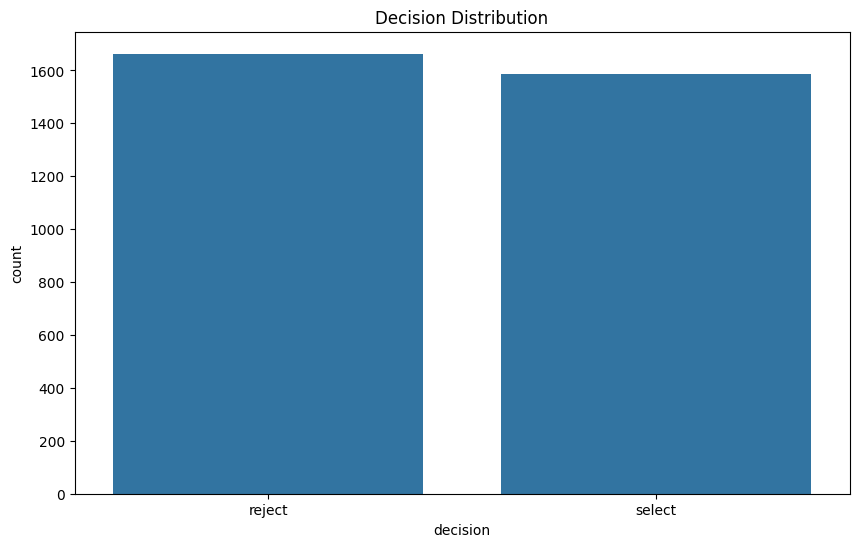

In [11]:
# Step 4: Exploratory Data Analysis
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='decision')
plt.title("Decision Distribution")
plt.show()


In [12]:
# Display all unique roles in the 'roles' column
unique_roles = final_data['role'].unique()
print(unique_roles)


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'Data Engineer' 'UI Designer' 'Project Manager' 'Software Developer'
 'UI Engineer' 'Digital Marketing Specialist' 'Cybersecurity Specialist'
 'HR Specialist' 'Network Engineer' 'Graphic Designer' 'Game Developer'
 'Mobile App Developer' 'Cloud Architect' 'Business Analyst'
 'Database Administrator' 'DevOps Engineer' 'Machine Learning Engineer'
 'Content Writer' 'System Administrator' 'UI/UX Designer' 'AI Engineer']


In [13]:
# Mapping dictionary for grouping roles
role_mapping = {
    'Software Developer': 'Software Engineer',
    'Software Engineer': 'Software Engineer',
    'Data Engineer': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'UI/UX Designer': 'UI/UX Designer',
    'UI Engineer': 'UI/UX Designer',
    'UI Designer': 'UI/UX Designer',
    'Cybersecurity Specialist': 'Cybersecurity Specialist',
    'Network Engineer': 'Cybersecurity Specialist',
    'Cloud Architect': 'Cloud Architect',
    'DevOps Engineer': 'Cloud Architect',
    'AI Engineer': 'AI Engineer',
    'Machine Learning Engineer': 'AI Engineer',
    'System Administrator': 'System Administrator',
    'Database Administrator': 'System Administrator',
    'Digital Marketing Specialist': 'Digital Marketing Specialist',
    'Content Writer': 'Digital Marketing Specialist',
    'Graphic Designer': 'Mobile Game Developer',
    'Game Developer': 'Mobile Game Developer',
    'Mobile App Developer': 'Mobile Game Developer',
    'HR Specialis': 'Digital Marketing Specialist',
    'HR Specialist' : 'Digital Marketing Specialist',
    'Project Manager' : 'System Administrator'
}


In [14]:
# Apply the mapping to group roles
final_data['role'] = final_data['role'].replace(role_mapping)

# Check the unique values after grouping
print(final_data['role'].unique())


['Data Scientist' 'Data Analyst' 'Software Engineer' 'Product Manager'
 'UI/UX Designer' 'System Administrator' 'Digital Marketing Specialist'
 'Cybersecurity Specialist' 'Mobile Game Developer' 'Cloud Architect'
 'Business Analyst' 'AI Engineer']


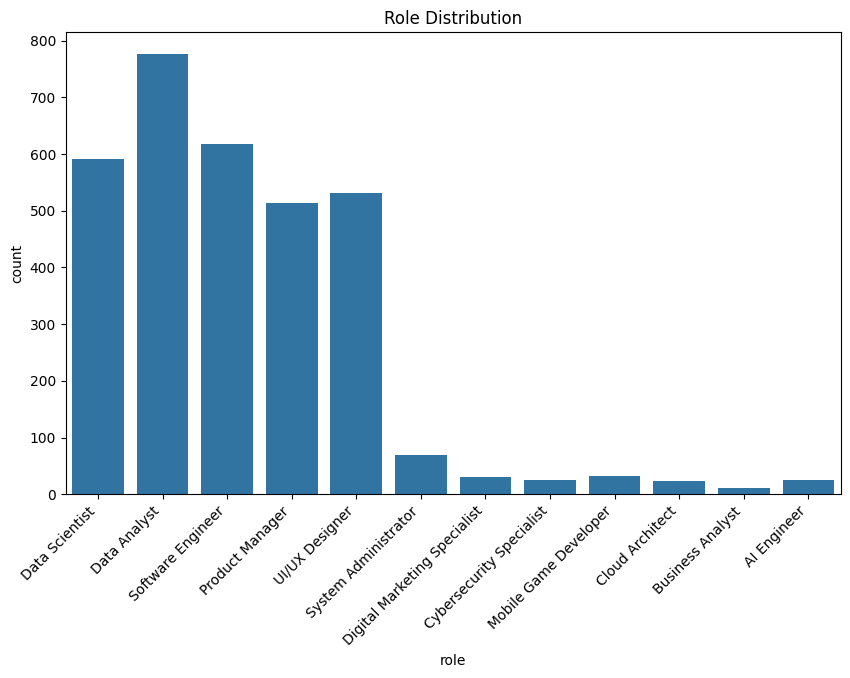

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=final_data, x='role')
plt.title("Role Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.show()


In [16]:
# Calculate the number of words in the 'Transcript' column
final_data['num_words_in_transcript'] = final_data['transcript'].apply(lambda x: len(str(x).split()))


In [17]:
# Group by Role and decision and calculate mean, median, and standard deviation
aggregated_data = final_data.groupby(['role', 'decision'])['num_words_in_transcript'].agg(['mean', 'median', 'std']).reset_index()


In [18]:
print(aggregated_data)

                            role decision        mean  median         std
0                    AI Engineer   reject  614.545455   584.0   84.985132
1                    AI Engineer   select  732.933333   754.0  172.415804
2               Business Analyst   reject  616.400000   578.0  110.323615
3               Business Analyst   select  693.833333   693.5   54.802980
4                Cloud Architect   reject  594.375000   621.0   65.038313
5                Cloud Architect   select  722.312500   718.5   64.263747
6       Cybersecurity Specialist   reject  586.733333   553.0  109.979522
7       Cybersecurity Specialist   select  748.000000   771.0   68.593812
8                   Data Analyst   reject  662.442543   657.0  128.670872
9                   Data Analyst   select  750.313351   758.0  124.340171
10                Data Scientist   reject  660.835526   653.0  125.954125
11                Data Scientist   select  733.187500   728.5  135.307700
12  Digital Marketing Specialist   rej

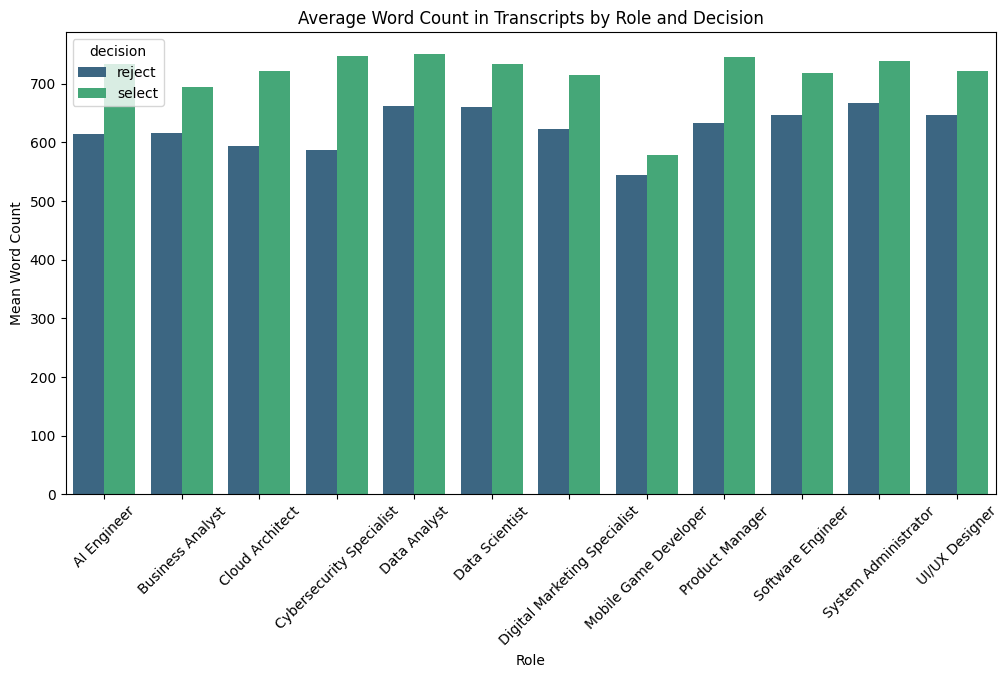

In [19]:
# Bar plot for mean word count by Role and decision
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='role', y='mean', hue='decision', palette='viridis')
plt.title('Average Word Count in Transcripts by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Mean Word Count')
plt.xticks(rotation=45)
plt.show()


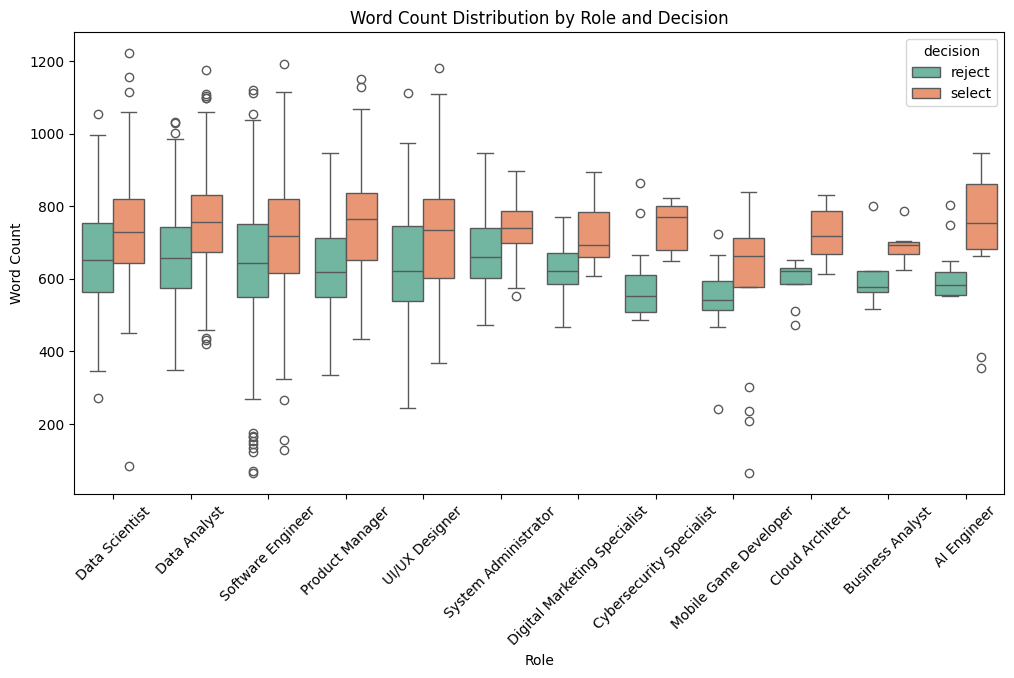

In [20]:
# Box plot for distribution of word count by Role and decision
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='role', y='num_words_in_transcript', hue='decision', palette='Set2')
plt.title('Word Count Distribution by Role and Decision')
plt.xlabel('Role')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()


**Word Count as a Predictor:**

1. Longer and more detailed responses correlate with a higher likelihood of selection for most roles.
2. Specific roles, such as AI Engineer, Product Manager, and Cybersecurity Specialist, show the strongest positive correlation between word count and selection.
3. Roles like Mobile Game Developer require less detail overall, as both selected and rejected candidates tend to have lower word counts.
4. Roles like Product Manager and AI Engineer place a premium on detailed responses.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Text preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
for col in ['transcript', 'resume', 'reason_for_decision', 'job_description']:
    final_data[col] = final_data[col].apply(preprocess_text)

In [23]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570


In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       3250 non-null   object
 1   name                     3250 non-null   object
 2   role                     3250 non-null   object
 3   transcript               3250 non-null   object
 4   resume                   3250 non-null   object
 5   decision                 3250 non-null   object
 6   reason_for_decision      3250 non-null   object
 7   job_description          3250 non-null   object
 8   num_words_in_transcript  3250 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 228.6+ KB


In [25]:
# Feature: Word count
final_data['transcript_word_count'] = final_data['transcript'].apply(lambda x: len(str(x).split()))
final_data['resume_word_count'] = final_data['resume'].apply(lambda x: len(str(x).split()))


In [26]:
# Sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
final_data['transcript_sentiment'] = final_data['transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [27]:
# TF-IDF vectorization and similarity scores
vectorizer = TfidfVectorizer()
job_desc_vectors = vectorizer.fit_transform(final_data['job_description'])
resume_vectors = vectorizer.transform(final_data['resume'])
transcript_vectors = vectorizer.transform(final_data['transcript'])

In [28]:
final_data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]
final_data['transcript_job_similarity'] = [cosine_similarity(transcript_vectors[i], job_desc_vectors[i])[0][0] for i in range(len(final_data))]


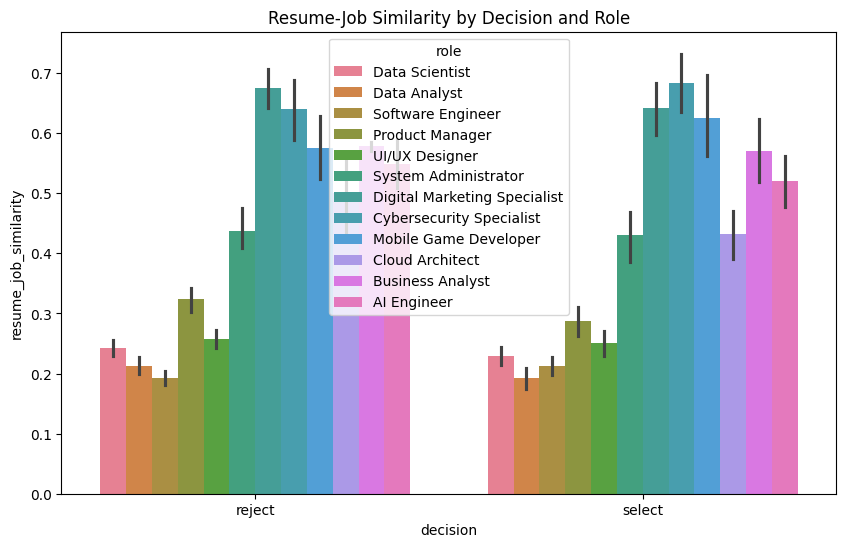

In [29]:
# Visualization example: Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=final_data, x='decision', y='resume_job_similarity', hue='role')
plt.title("Resume-Job Similarity by Decision and Role")
plt.show()

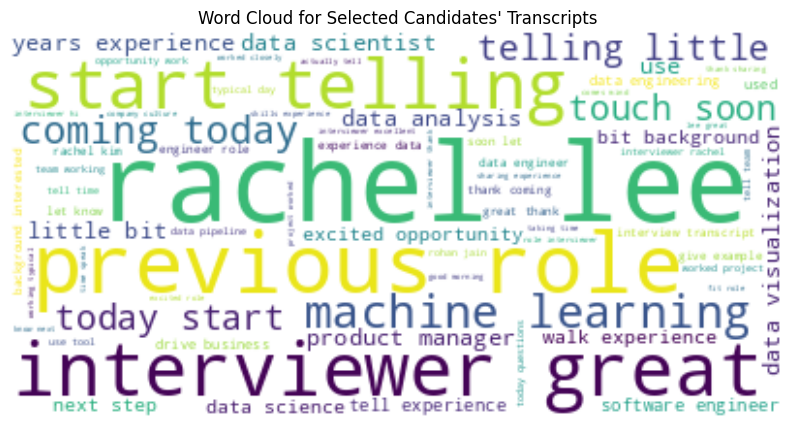

In [30]:
# Word cloud for selected candidates
selected_transcripts = " ".join(final_data[final_data['decision'] == 'select']['transcript'])
wordcloud = WordCloud(background_color='white').generate(selected_transcripts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Selected Candidates' Transcripts")
plt.show()

In [31]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,194,0.9960,0.091821,0.057267
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,247,0.9989,0.249142,0.148987
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,220,0.9987,0.110005,0.077081
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,260,0.9978,0.183146,0.204541
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,167,0.9979,0.071296,0.083546


**Observations:**
1. ***Higher Resume-Job Similarity for Selected Candidates:***
Across most roles, candidates with higher similarity scores (bars closer to 1.0 on the Y-axis) are more likely to be selected.
Examples:
Data Scientist: Selected candidates have significantly higher similarity scores than rejected ones.
AI Engineer: A clear gap between selected and rejected candidates, showing the importance of aligning resumes to the job description.

2. ***Roles with Less Impact of Resume Similarity:***
Some roles, such as System Administrator and UI/UX Designer, show smaller differences in resume-job similarity between selected and rejected candidates.
This indicates that other factors (e.g., transcript quality or interview performance) may weigh more heavily in selection.

3. ***Rejected Candidates Scores Are Generally Lower:***
Most roles show that rejected candidates have lower resume-job similarity scores, supporting the idea that alignment with the job description is crucial.

In [32]:
print(final_data.head())  # Check the first few rows
print(final_data.info())  # Check for missing or null values
print(final_data.describe())  # Summary statistics for numerical columns


        id    name               role  \
0  harima1   Ishan     Data Scientist   
1  harima2   Rajiv       Data Analyst   
2  harima3  Oliver  Software Engineer   
3  harima4   Aarav    Product Manager   
4  harima5   Sonia  Software Engineer   

                                          transcript  \
0  interviewer hi ishan thanks applying data scie...   
1  interviewer hi rajiv thanks coming today start...   
2  interviewer hi oliver thanks taking time speak...   
3  interviewer hi aarav thank coming today start ...   
4  interviewer hi sonia thanks coming today start...   

                                              resume decision  \
0  ishan contact information address main st anyt...   reject   
1  rajiv contact information email rajiv mailto r...   select   
2  oliver software engineer contact information e...   select   
3  aarav contact information email aarav mailto a...   select   
4  sonia contact information email sonia mailto s...   reject   

                         

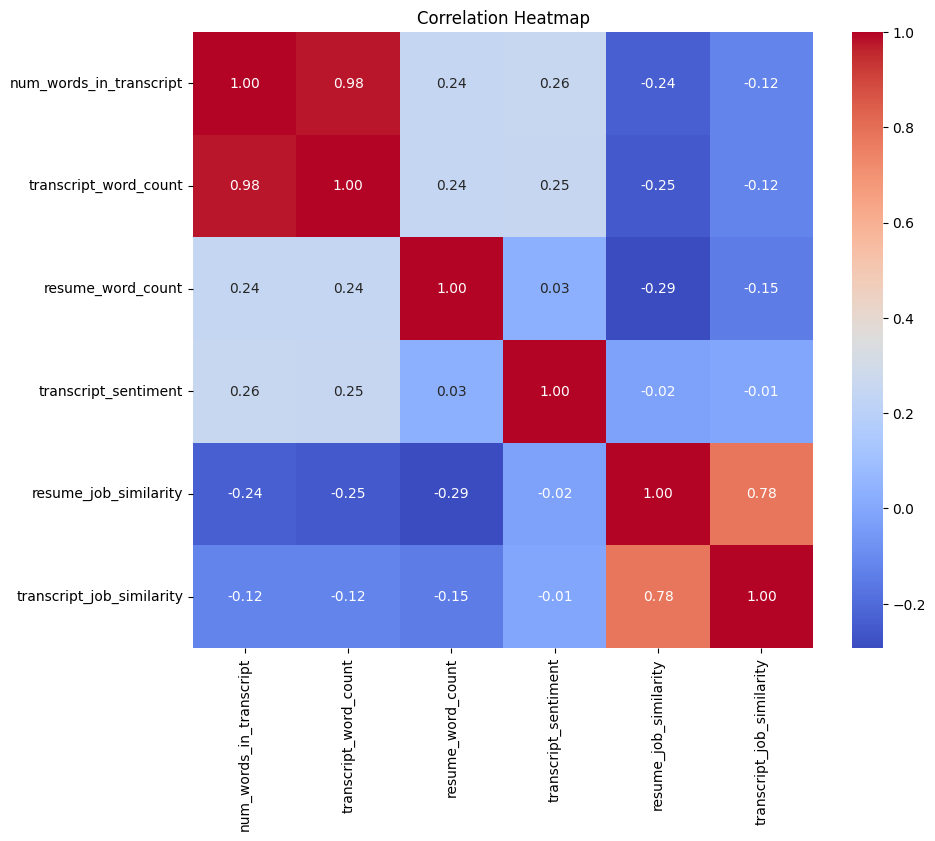

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(final_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


**Correlation Heatmap: Visualize relationships between numerical variables like resume_job_similarity, transcript_job_similarity, transcript_sentiment, and decision.**

1. Feature Redundancy: **num_words_in_transcript** and **transcript_word_count** are highly correlated, suggesting you can remove one without losing information.
2. Resume and Transcript Similarity: A high correlation between **resume_job_similarity** and **transcript_job_similarity** highlights that alignment across both documents is an important factor.
3. Sentiment's Role: Sentiment in transcripts shows weak correlations with other features, indicating it's an independent factor.
4. Conciseness Matters: Negative correlations between word counts and job similarity suggest that conciseness might play a role in better job alignment.

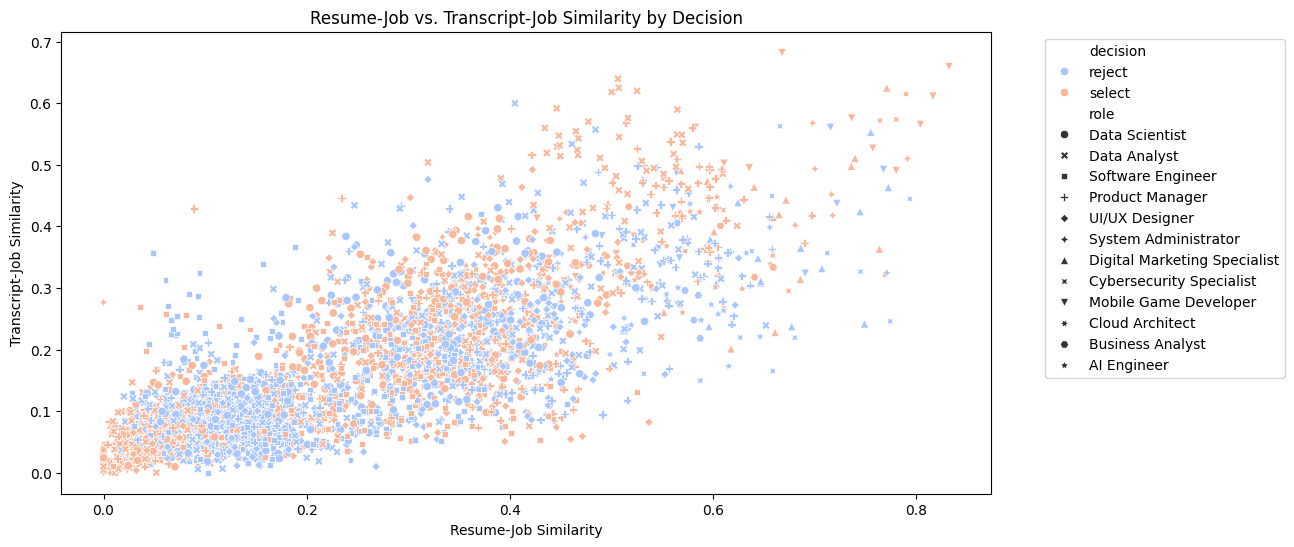

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=final_data,
    x='resume_job_similarity',
    y='transcript_job_similarity',
    hue='decision',
    style='role',
    palette='coolwarm'
)
plt.title("Resume-Job vs. Transcript-Job Similarity by Decision")
plt.xlabel("Resume-Job Similarity")
plt.ylabel("Transcript-Job Similarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Multivariate Analysis :**
**Explore interactions between variables like resume_job_similarity, transcript_job_similarity, and transcript_sentiment for decision outcomes.**


1. Predictive Power of Similarity Metrics: Both Resume-Job Similarity and Transcript-Job Similarity are strong indicators of selection decisions.
2. Candidates with higher scores in both dimensions are more likely to be selected.
3. Importance of Consistency: High correlation between the two metrics suggests that consistency between a candidate's resume and transcript matters.
4. Role-Specific Trends: Different roles may require varying similarity thresholds for selection. Higher-demand roles might require higher alignment with job descriptions.
5. Insights for Improvement: Rejected candidates can focus on improving either their resumes or interview responses to align better with the job description, especially if scores in one area are low.

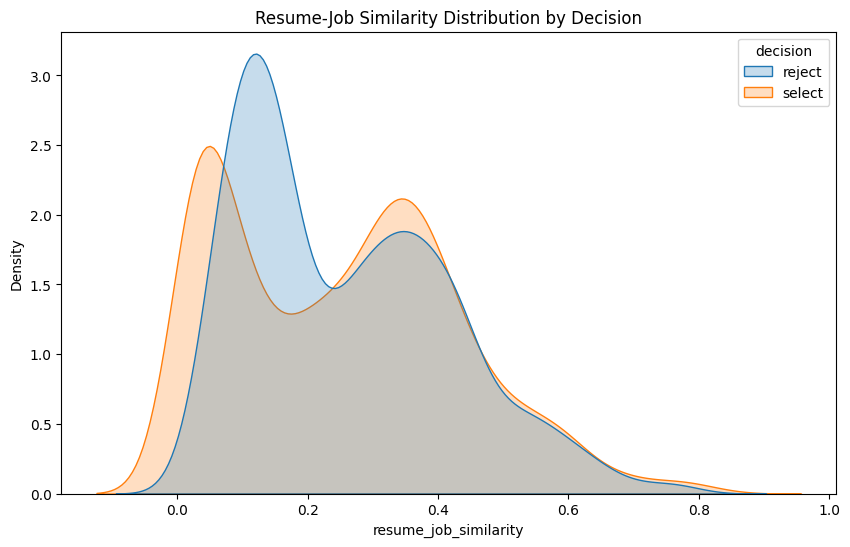

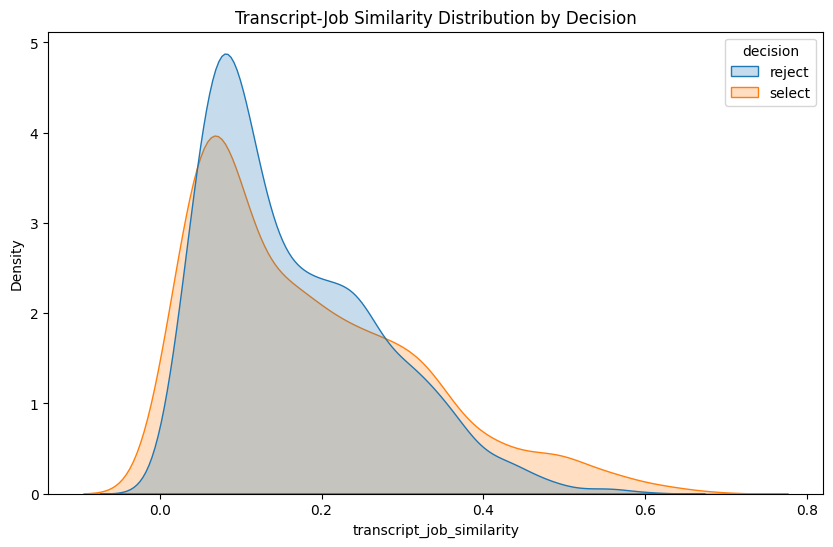

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='resume_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Resume-Job Similarity Distribution by Decision")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=final_data, x='transcript_job_similarity', hue='decision', fill=True, common_norm=False)
plt.title("Transcript-Job Similarity Distribution by Decision")
plt.show()


**Feature Distribution :**
Analyze the distribution of resume_job_similarity and transcript_job_similarity across decisions.


<ipython-input-36-dffe48924c95>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')


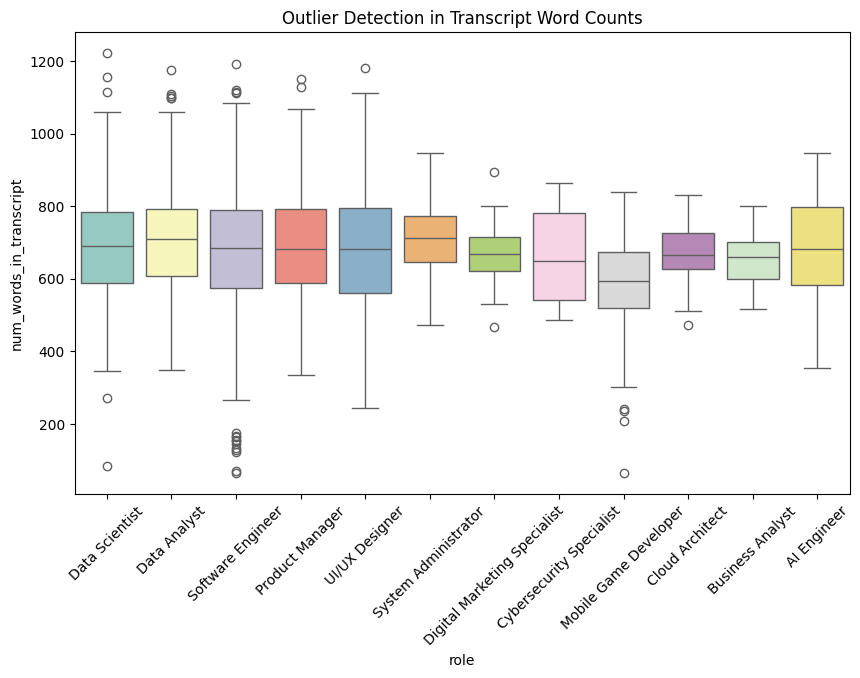

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, y='num_words_in_transcript', x='role', palette='Set3')
plt.title("Outlier Detection in Transcript Word Counts")
plt.xticks(rotation=45)
plt.show()


**Outlier Detection :**
Identify and visualize potential outliers in num_words_in_transcript and other numerical features.


**Accomplishments**

***Data Loading and Cleaning:***

1. Loaded multiple datasets from Excel files and concatenated them.
2. Standardized column names and handled missing values by filling them with "Unknown".
3. Removed duplicate entries to maintain data quality.
***Data Transformation:***
1. Standardized the decision column to have consistent values (select or reject).
2. Mapped roles into broader categories to simplify analysis.
3. Created new features such as word counts in the transcript column and sentiment scores.
***Exploratory Data Analysis (EDA):***
1. Visualized decision distributions using bar plots.
2. Analyzed role distributions post-grouping.
3. Conducted univariate and multivariate analyses on word counts and decisions.
***Insights from EDA:***
1. Longer Responses Correlate with Success: Candidates with higher word counts in their transcripts tend to get selected, especially in roles like AI Engineer and Product Manager.
2. Role-Specific Trends: For roles like Mobile Game Developer, the correlation between word count and selection is weaker.
3. Resume-Job Similarity: High alignment between resumes and job descriptions increases the likelihood of selection.
***Advanced Analysis:***
1. Performed sentiment analysis on transcripts to capture emotional tones.
Computed TF-IDF similarity scores to quantify the alignment of resumes and transcripts with job descriptions.
2. Visualized findings using bar plots, box plots, and word clouds.
Feature Engineering:

Added additional features such as word count for resume and transcript, and similarity metrics (resume_job_similarity and transcript_job_similarity).



# **ASSIGNMENT - 3:**


In [37]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,194,0.9960,0.091821,0.057267
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,247,0.9989,0.249142,0.148987
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,220,0.9987,0.110005,0.077081
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,260,0.9978,0.183146,0.204541
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,167,0.9979,0.071296,0.083546


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Convert the data into a DataFrame
df = pd.DataFrame(final_data)

# Encode the target variable ('decision') into binary (0 for reject, 1 for select)
df['decision'] = df['decision'].map({'reject': 0, 'select': 1})

# List of features to scale/normalize
features_to_scale = [
    "resume_job_similarity",
    "transcript_job_similarity",
    "transcript_sentiment",
    "transcript_word_count",
    "resume_word_count"
]

# Using StandardScaler for standardization
scaler = StandardScaler()
df_scaled = df.copy()  # Create a copy to retain original data
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display scaled features
print("Scaled DataFrame:\n", df_scaled)



Scaled DataFrame:
              id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi soni

**Standardization** ensures all features are on the same scale, preventing features with large ranges (e.g., transcript_word_count) from dominating those with smaller ranges (e.g., resume_job_similarity).

**transcript_word_count** (-1.951232 for the first row):
This indicates that the transcript_word_count for this record is about 1.95 standard deviations below the mean of this feature across the dataset.

**resume_job_similarity** (-0.962192 for the first row):
The similarity score between the resume and job description for this candidate is about 0.96 standard deviations below the mean.

**transcript_sentiment** (-0.167754 for the first row):
The sentiment score is slightly below the mean for this feature.

In [39]:
# Optionally, use MinMaxScaler for normalization if required
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Display normalized features
print("\nNormalized DataFrame:\n", df_normalized)


Normalized DataFrame:
              id             name               role  \
0       harima1            Ishan     Data Scientist   
1       harima2            Rajiv       Data Analyst   
2       harima3           Oliver  Software Engineer   
3       harima4            Aarav    Product Manager   
4       harima5            Sonia  Software Engineer   
...         ...              ...                ...   
3245  durgba196       Pedro Lara       Data Analyst   
3246  durgba197   Joseph Jimenez     Data Scientist   
3247  durgba198     Scott Harvey  Software Engineer   
3248  durgba199       Tami Sharp    Product Manager   
3249  durgba200  John Williamson  Software Engineer   

                                             transcript  \
0     interviewer hi ishan thanks applying data scie...   
1     interviewer hi rajiv thanks coming today start...   
2     interviewer hi oliver thanks taking time speak...   
3     interviewer hi aarav thank coming today start ...   
4     interviewer hi

In [40]:
final_data.head()

,id,name,role,transcript,resume,decision,reason_for_decision,job_description,num_words_in_transcript,transcript_word_count,resume_word_count,transcript_sentiment,resume_job_similarity,transcript_job_similarity
0,harima1,Ishan,Data Scientist,interviewer hi ishan thanks applying data scie...,ishan contact information address main st anyt...,reject,candidate demonstrate strong competency machin...,looking skilled data scientist least years exp...,395,211,194,0.9960,0.091821,0.057267
1,harima2,Rajiv,Data Analyst,interviewer hi rajiv thanks coming today start...,rajiv contact information email rajiv mailto r...,select,strong expertise dashboards creation solid bac...,seeking talented data analyst years expertise ...,636,367,247,0.9989,0.249142,0.148987
2,harima3,Oliver,Software Engineer,interviewer hi oliver thanks taking time speak...,oliver software engineer contact information e...,select,combination years experience proficiency agile...,seeking talented software engineer years exper...,840,445,220,0.9987,0.110005,0.077081
3,harima4,Aarav,Product Manager,interviewer hi aarav thank coming today start ...,aarav contact information email aarav mailto a...,select,strong expertise kpi monitoring business strat...,seeking talented product manager years experti...,800,426,260,0.9978,0.183146,0.204541
4,harima5,Sonia,Software Engineer,interviewer hi sonia thanks coming today start...,sonia contact information email sonia mailto s...,reject,candidate lacked sufficient expertise key skil...,looking skilled software engineer least years ...,570,312,167,0.9979,0.071296,0.083546


In [41]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define the target variable (Y) and features (X)
# Drop irrelevant columns to extract feature variables
X = final_data.drop(columns=['decision', 'id', 'name', 'role', 'transcript', 'resume', 'reason_for_decision', 'job_description'])
Y = final_data['decision']

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Output shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (2600, 6)
X_test shape: (650, 6)
Y_train shape: (2600,)
Y_test shape: (650,)


# Logistic Regerssion

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score


In [43]:
# Logistic Regression and its hyperparameters
log_reg = LogisticRegression(random_state=42, max_iter=1000)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

In [44]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, Y_train)

# Get the best model
best_log_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [45]:
# Make predictions
Y_pred = best_log_reg.predict(X_test)
Y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_lr = accuracy_score(Y_test, Y_pred)
roc_auc_lr = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_lr)
print("ROC AUC Score:", roc_auc_lr)


Accuracy: 0.7276923076923076
ROC AUC Score: 0.8070040899795502


In [46]:
print(f"Best Logistic Regression Model: {best_log_reg}")
print(f"Test Set Accuracy: {accuracy_lr:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_lr:.4f}")


Best Logistic Regression Model: LogisticRegression(C=100, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')
Test Set Accuracy: 0.7277
Test Set ROC AUC Score: 0.8070


**GridSearchCV**: Tunes C (inverse of regularization strength), penalty (type of regularization), and solver (algorithm for optimization).

**Accuracy**: Measures the proportion of correctly predicted labels.

**ROC AUC Score**: Evaluates the model's ability to distinguish between classes.

***I got a 72 % accuracy and 80% ROC AUC Score which is good***

# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Decision Tree and its hyperparameters
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [49]:
# Grid search for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

# Fit the model on training data
grid_search.fit(X_train, Y_train)

# Get the best model
best_decision_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [50]:
# Make predictions
Y_pred = best_decision_tree.predict(X_test)
Y_pred_proba = best_decision_tree.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_dt = accuracy_score(Y_test, Y_pred)
roc_auc_dt = roc_auc_score(Y_test, Y_pred_proba)

print("Accuracy:", accuracy_dt)
print("ROC AUC Score:", roc_auc_dt)


Accuracy: 0.7153846153846154
ROC AUC Score: 0.8212906157691434


In [51]:
print(f"Best Decision Tree Model: {best_decision_tree}")
print(f"Test Set Accuracy: {accuracy_dt:.4f}")
print(f"Test Set ROC AUC Score: {roc_auc_dt:.4f}")


Best Decision Tree Model: DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)
Test Set Accuracy: 0.7154
Test Set ROC AUC Score: 0.8213


Now we can say that it is slightly better than logistic regression as it sacccuracy si 71% and ROC AUC Score is 82%

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model directly
rf_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = rf_model.predict(X_test)
Y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_rf = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")


Accuracy: 0.7477
ROC AUC Score: 0.8497


Random forest is a etter than Logistic regression and Decision Tree as its accuracy is 74% and ROCAUC Score is 84%

# XGBoost

In [53]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Define the model
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model directly
xgboost_model.fit(X_train, Y_train_encoded)

# Predictions
Y_pred = xgboost_model.predict(X_test)
Y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(Y_test_encoded, Y_pred)
roc_auc_xgb = roc_auc_score(Y_test_encoded, Y_pred_proba)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")


Accuracy: 0.7677
ROC AUC Score: 0.8587


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:08:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBOost is better than the above models(Logistic regression, Decision Tree, Random Forest) as its
Accuracy is 76%
Roc Auc Score is 85%

# SVM

In [54]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Create an SVM model
svm_model = SVC(probability=True, kernel='rbf', C=1, gamma='scale')  # Directly using parameters

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = svm_model.predict(X_test)
Y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

# Evaluate model using Accuracy and ROC AUC Score
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_pred_prob_svm)

print(f"Accuracy of SVM model: {accuracy_svm:.4f}")
print(f"ROC AUC Score of SVM model: {roc_auc_svm:.4f}")


Accuracy of SVM model: 0.7246
ROC AUC Score of SVM model: 0.7988


It is given good accuracy but not better than XGBoost




# Comparing All the models(POST MODEL ANALYSIS)

In [55]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}, ROC AUC: {roc_auc_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}, ROC AUC: {roc_auc_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}, ROC AUC: {roc_auc_rf:.4f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}, ROC AUC: {roc_auc_xgb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}, ROC AUC: {roc_auc_svm:.4f}")


Logistic Regression Accuracy: 0.7277, ROC AUC: 0.8070
Decision Tree Accuracy: 0.7154, ROC AUC: 0.8213
Random Forest Accuracy: 0.7477, ROC AUC: 0.8497
XGBoost Accuracy: 0.7677, ROC AUC: 0.8587
SVM Accuracy: 0.7246, ROC AUC: 0.7988


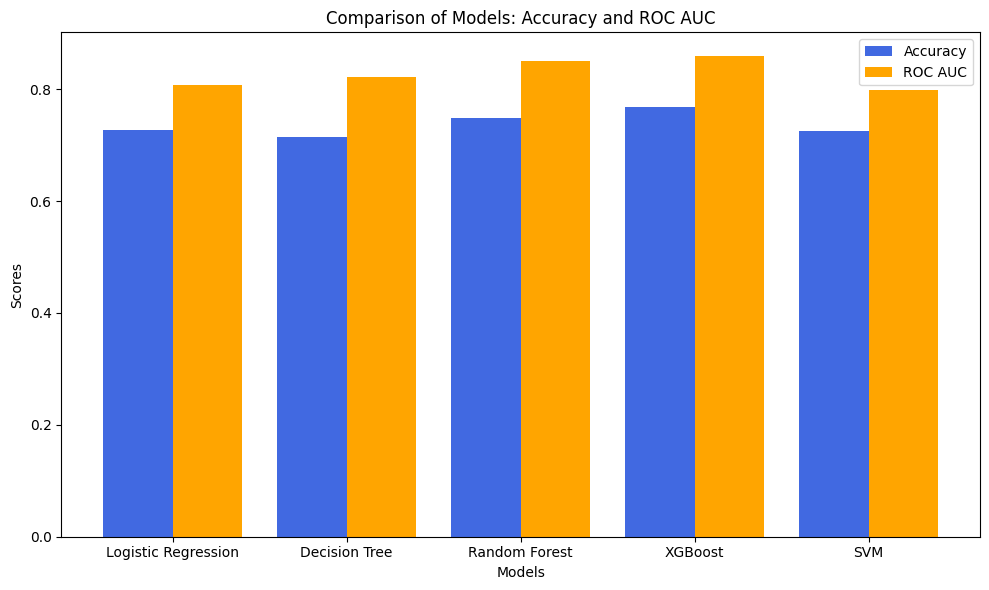

In [56]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM']

# Accuracy scores for each model
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svm]

# ROC AUC scores for each model
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_svm]

# Plotting the bar chart
x = range(len(models))
width = 0.4  # bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy bar chart
ax.bar(x, accuracy_scores, width=width, label='Accuracy', color='royalblue', align='center')

# ROC AUC bar chart
ax.bar([p + width for p in x], roc_auc_scores, width=width, label='ROC AUC', color='orange', align='center')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models: Accuracy and ROC AUC')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)

# Show legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


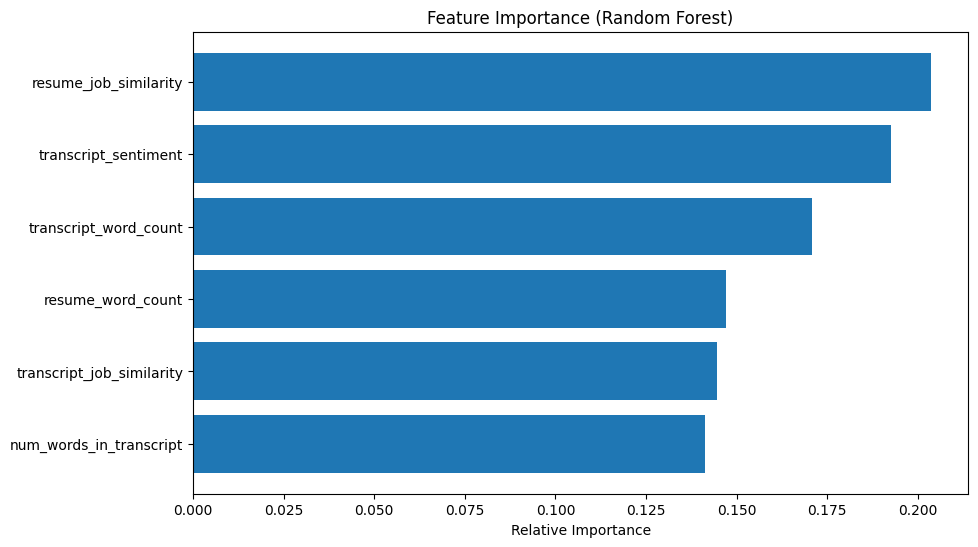

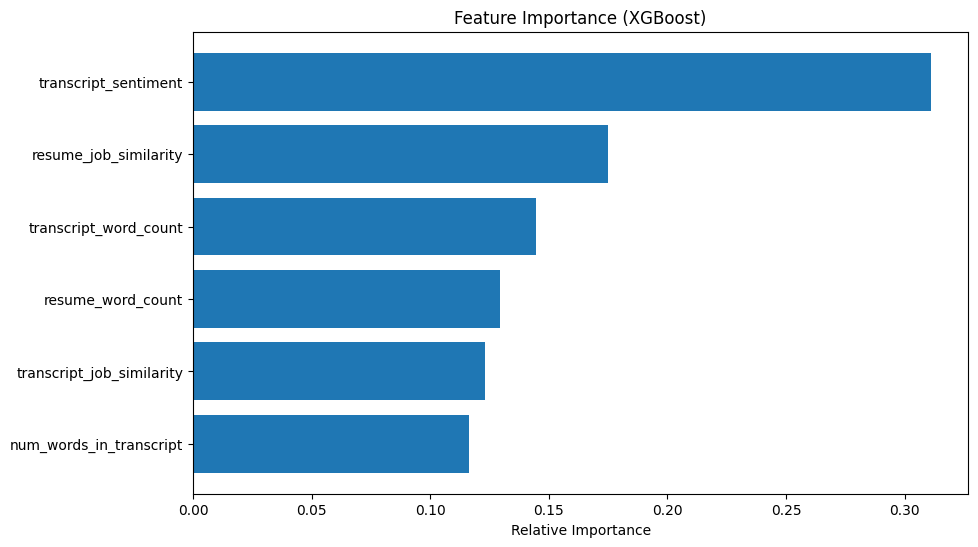

In [57]:
import matplotlib.pyplot as plt

# For Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = importances_rf.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(importances_rf)), importances_rf[indices_rf], align="center")
plt.yticks(range(len(importances_rf)), [X_train.columns[i] for i in indices_rf])
plt.xlabel("Relative Importance")
plt.show()

# For XGBoost
importances_xgb = xgboost_model.feature_importances_
indices_xgb = importances_xgb.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.barh(range(len(importances_xgb)), importances_xgb[indices_xgb], align="center")
plt.yticks(range(len(importances_xgb)), [X_train.columns[i] for i in indices_xgb])
plt.xlabel("Relative Importance")
plt.show()


# Significant Insights and Takeaways

1. **Logistic Regression**: While it is a simple and interpretable model, it might perform worse on complex non-linear relationships. It is best suited for linearly separable problems.
2. ** Decision Tree**: Decision Trees provide clear, interpretable results and can be visualized to understand how decisions are made. However, they are prone to overfitting.
3. ** Decision Tree**: Decision Trees provide clear, interpretable results and can be visualized to understand how decisions are made. However, they are prone to overfitting.
4.  **Random Forest**: By aggregating multiple Decision Trees, Random Forest generally provides better generalization and is less likely to overfit compared to a single Decision Tree.
5.  **XGBoost**: XGBoost tends to be a very strong performer in terms of both accuracy and ROC AUC, especially on structured/tabular data. It's efficient and can handle both linear and non-linear relationships.
6.  **SVM**: SVM works well for classification tasks and is effective in high-dimensional spaces. It might not perform as well in very large datasets or with complex feature interactions.

**Best Model**: Based on the comparison of Accuracy and ROC AUC Score, XGBoost might emerge as the best model, XGBoost (and also Random Forest) allow easy extraction of feature importance, helping you understand which features are driving predictions.